In [1]:
!pip install wordcloud
!pip install -U nltk
!pip install rake-nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("E:\\NCKH\\NCKHNew\\labeled_data_final.csv", header=0)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5348\2693488726.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:\\NCKH\\NCKHNew\\labeled_data_final.csv", header=0)


,index,reviewer_name,reviewer_country,rental_date,comments,language,sentiment
0,0,Igor,Kraków- Ba Lan,02/12/2023 00:00,best support ever witnessed answer fast kind s...,en,positive
1,1,Kevin,Cannes- Pháp,04/12/2023 00:00,everything ok,en,positive
2,2,Walid,Cannes- Pháp,09/12/2023 00:00,great accommodation games owner responded quickly,en,positive
3,3,Maxence,Vương quốc Anh,11/12/2023 00:00,thanks nigel tra friendly stay ho chi minh cit...,en,positive
4,4,Lisa,Ai/len,10/12/2023 00:00,nigel others dedicated responded quickly stay ...,en,positive


In [10]:

df = df.drop(['index', 'reviewer_name', 'reviewer_country', 'rental_date', 'language'], axis = 1)
df.head()

,comments,sentiment
0,best support ever witnessed answer fast kind s...,positive
1,everything ok,positive
2,great accommodation games owner responded quickly,positive
3,thanks nigel tra friendly stay ho chi minh cit...,positive
4,nigel others dedicated responded quickly stay ...,positive


In [11]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

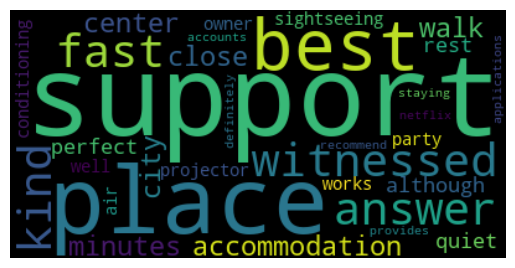

In [12]:
# Start with one review:
text = df.comments[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

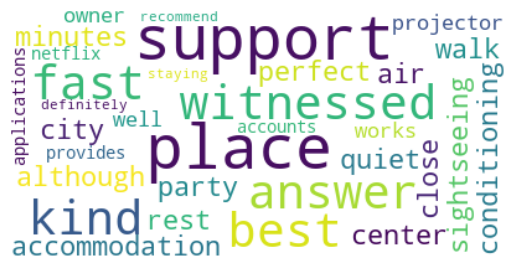

In [13]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# Loại bỏ các giá trị không phải là chuỗi từ cột 'comments'
comments_str = [str(comment) for comment in df['comments'] if isinstance(comment, str)]

# Kết hợp các chuỗi lại với nhau
text = " ".join(comments_str)

# In số lượng từ trong chuỗi kết hợp
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 62420888 words in the combination of all reviews.


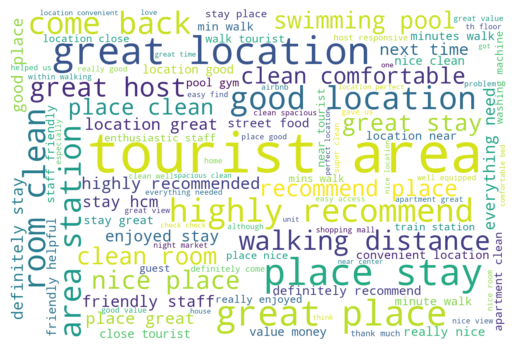

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, max_words=100, background_color="white", colormap='viridis',).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
wordcloud.to_file("img/first_review.png")

In [17]:
word_freq = wordcloud.words_

# Sắp xếp danh sách từ theo số lần xuất hiện
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# In ra những từ xuất hiện nhiều nhất
print("Top 10 words:")
words = []
frequency = []
for word, freq in sorted_word_freq[:30]:
    x=int(freq * len(text))
    print(f"{word}: {int(freq * len(text))}")
    words.append(word)  # Append word directly to the list
    frequency.append(x)  # Append freq directly to the list

Top 10 words:
tourist area: 62420888
great location: 22969890
place stay: 21367487
great place: 19537073
highly recommend: 15878358
good location: 15312556
room clean: 14620081
come back: 14600025
area station: 13857937
walking distance: 13361804
great host: 12784390
nice place: 11454332
clean room: 10466289
swimming pool: 10442010
great stay: 10180221
recommend place: 9460301
clean comfortable: 9310405
place clean: 9057061
highly recommended: 8970502
place great: 8903999
next time: 8831162
location great: 8412088
everything need: 8140799
good place: 8038406
enjoyed stay: 7845230
stay hcm: 7800895
friendly staff: 7760782
definitely stay: 7626721
definitely recommend: 7215036
street food: 6991249


In [18]:
print(words)
print(frequency)

['tourist area', 'great location', 'place stay', 'great place', 'highly recommend', 'good location', 'room clean', 'come back', 'area station', 'walking distance', 'great host', 'nice place', 'clean room', 'swimming pool', 'great stay', 'recommend place', 'clean comfortable', 'place clean', 'highly recommended', 'place great', 'next time', 'location great', 'everything need', 'good place', 'enjoyed stay', 'stay hcm', 'friendly staff', 'definitely stay', 'definitely recommend', 'street food']
[62420888, 22969890, 21367487, 19537073, 15878358, 15312556, 14620081, 14600025, 13857937, 13361804, 12784390, 11454332, 10466289, 10442010, 10180221, 9460301, 9310405, 9057061, 8970502, 8903999, 8831162, 8412088, 8140799, 8038406, 7845230, 7800895, 7760782, 7626721, 7215036, 6991249]


In [19]:
data = pd.DataFrame({'Word': words, 'Frequency': frequency})
data.head()

,Word,Frequency
0,tourist area,62420888
1,great location,22969890
2,place stay,21367487
3,great place,19537073
4,highly recommend,15878358


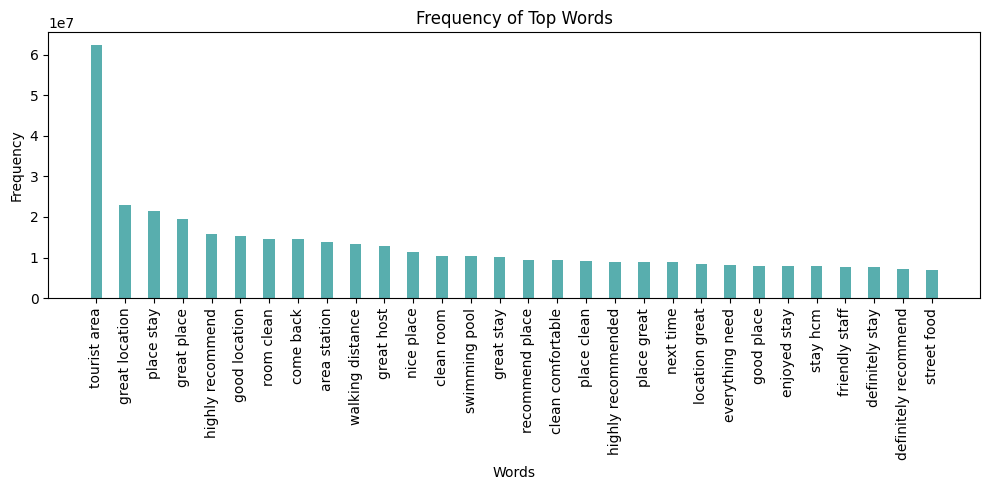

In [20]:
# creating the dataset
courses = list(data['Word'])
values = list(data['Frequency'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color='#58AEAE', width=0.4)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Top Words")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# POSITIVE

In [54]:
df_pos = df.loc[df['sentiment'] == 'positive']
df_pos.head()

,comments,sentiment
0,best support ever witnessed answer fast kind s...,positive
1,everything ok,positive
2,great accommodation games owner responded quickly,positive
3,thanks nigel tra friendly stay ho chi minh cit...,positive
4,nigel others dedicated responded quickly stay ...,positive


In [55]:
# Loại bỏ các giá trị không phải là chuỗi từ cột 'comments'
comments_str = [str(comment) for comment in df_pos['comments'] if isinstance(comment, str)]

# Kết hợp các chuỗi lại với nhau
text = " ".join(comments_str)

# In số lượng từ trong chuỗi kết hợp
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 55234054 words in the combination of all reviews.


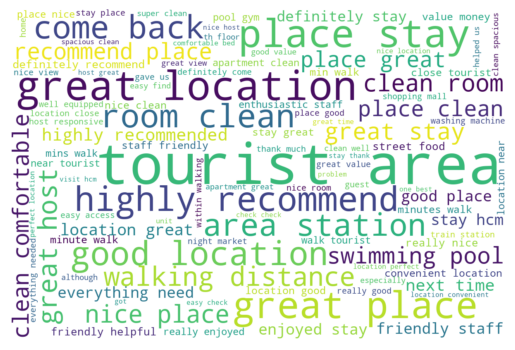

In [56]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, max_words=100, background_color="white", colormap='viridis',).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [57]:
wordcloud.to_file("img/positive_review.png")

In [58]:
word_freq = wordcloud.words_

# Sắp xếp danh sách từ theo số lần xuất hiện
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# In ra những từ xuất hiện nhiều nhất
print("Top 10 words:")
words = []
frequency = []
for word, freq in sorted_word_freq[:30]:
    x=int(freq * len(text))
    print(f"{word}: {int(freq * len(text))}")
    words.append(word)  # Append word directly to the list
    frequency.append(x)  # Append freq directly to the list

Top 10 words:
tourist area: 55234054
great location: 24555837
place stay: 22623297
great place: 20894303
highly recommend: 17157296
good location: 16241341
room clean: 15607834
come back: 15358547
area station: 14379699
walking distance: 14104112
great host: 13766775
nice place: 12227604
clean room: 11198440
great stay: 10922853
swimming pool: 10698724
recommend place: 10169277
clean comfortable: 10077796
place clean: 9753038
place great: 9747320
highly recommended: 9684427
next time: 9299062
location great: 9022332
everything need: 8646115
good place: 8508893
enjoyed stay: 8426560
friendly staff: 8364811
stay hcm: 8325931
definitely stay: 8130390
definitely recommend: 7789623
really nice: 7431702


In [59]:
print(words)
print(frequency)

['tourist area', 'great location', 'place stay', 'great place', 'highly recommend', 'good location', 'room clean', 'come back', 'area station', 'walking distance', 'great host', 'nice place', 'clean room', 'great stay', 'swimming pool', 'recommend place', 'clean comfortable', 'place clean', 'place great', 'highly recommended', 'next time', 'location great', 'everything need', 'good place', 'enjoyed stay', 'friendly staff', 'stay hcm', 'definitely stay', 'definitely recommend', 'really nice']
[55234054, 24555837, 22623297, 20894303, 17157296, 16241341, 15607834, 15358547, 14379699, 14104112, 13766775, 12227604, 11198440, 10922853, 10698724, 10169277, 10077796, 9753038, 9747320, 9684427, 9299062, 9022332, 8646115, 8508893, 8426560, 8364811, 8325931, 8130390, 7789623, 7431702]


In [60]:
data = pd.DataFrame({'Word': words, 'Frequency': frequency})
data.head()

,Word,Frequency
0,tourist area,55234054
1,great location,24555837
2,place stay,22623297
3,great place,20894303
4,highly recommend,17157296


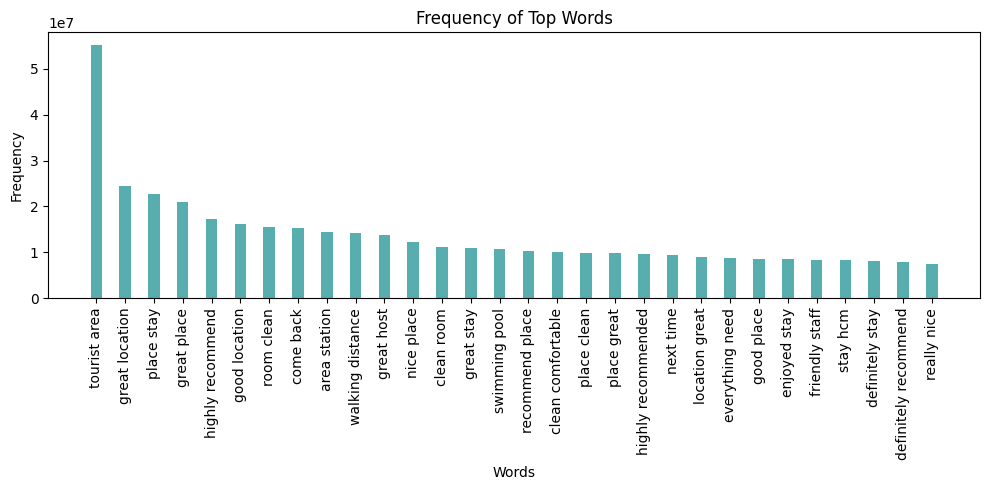

In [61]:
# creating the dataset
courses = list(data['Word'])
values = list(data['Frequency'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color='#58AEAE', width=0.4)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Top Words")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Negative

In [62]:
df_neg = df.loc[df['sentiment'] == 'negative']
df_neg.head()

,comments,sentiment
14,small accommodation ventilation system bad sme...,negative
40,problems door air conditioning key temperature...,negative
135,projector bit blurry expected checking problem...,negative
172,good location difficult enter door quite diffi...,negative
349,bathroom best stayed well going good bathroom ...,negative


In [63]:
# Loại bỏ các giá trị không phải là chuỗi từ cột 'comments'
comments_str = [str(comment) for comment in df_neg['comments'] if isinstance(comment, str)]

# Kết hợp các chuỗi lại với nhau
text = " ".join(comments_str)

# In số lượng từ trong chuỗi kết hợp
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 3624561 words in the combination of all reviews.


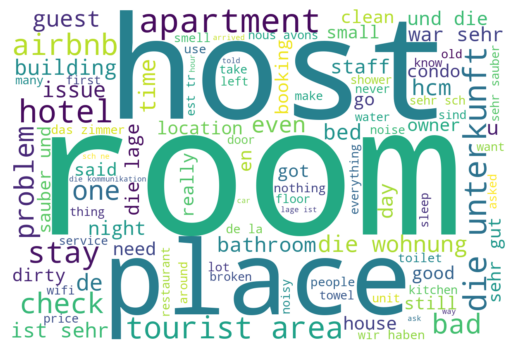

In [64]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, max_words=100, background_color="white", colormap='viridis',).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [65]:
wordcloud.to_file("img/negative_review.png")

In [66]:
word_freq = wordcloud.words_

# Sắp xếp danh sách từ theo số lần xuất hiện
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# In ra những từ xuất hiện nhiều nhất
print("Top 10 words:")
words = []
frequency = []
for word, freq in sorted_word_freq[:30]:
    x=int(freq * len(text))
    print(f"{word}: {int(freq * len(text))}")
    words.append(word)  # Append word directly to the list
    frequency.append(x)  # Append freq directly to the list

Top 10 words:
room: 3624561
host: 2077475
place: 1934201
apartment: 1829500
hotel: 1581526
die unterkunft: 1570505
tourist area: 1476826
stay: 1424475
airbnb: 1363859
check: 1253648
bad: 1188900
problem: 1147571
one: 1143438
die wohnung: 1137927
guest: 1121395
even: 1102109
de: 1085577
time: 1078689
hcm: 1019450
issue: 993275
bed: 951946
building: 951946
bathroom: 929904
ist sehr: 929904
day: 892708
u: 887197
war sehr: 861022
staff: 850001
night: 830714
die lage: 803161


In [67]:
print(words)
print(frequency)

['room', 'host', 'place', 'apartment', 'hotel', 'die unterkunft', 'tourist area', 'stay', 'airbnb', 'check', 'bad', 'problem', 'one', 'die wohnung', 'guest', 'even', 'de', 'time', 'hcm', 'issue', 'bed', 'building', 'bathroom', 'ist sehr', 'day', 'u', 'war sehr', 'staff', 'night', 'die lage']
[3624561, 2077475, 1934201, 1829500, 1581526, 1570505, 1476826, 1424475, 1363859, 1253648, 1188900, 1147571, 1143438, 1137927, 1121395, 1102109, 1085577, 1078689, 1019450, 993275, 951946, 951946, 929904, 929904, 892708, 887197, 861022, 850001, 830714, 803161]


In [68]:
data = pd.DataFrame({'Word': words, 'Frequency': frequency})
data.head()

,Word,Frequency
0,room,3624561
1,host,2077475
2,place,1934201
3,apartment,1829500
4,hotel,1581526


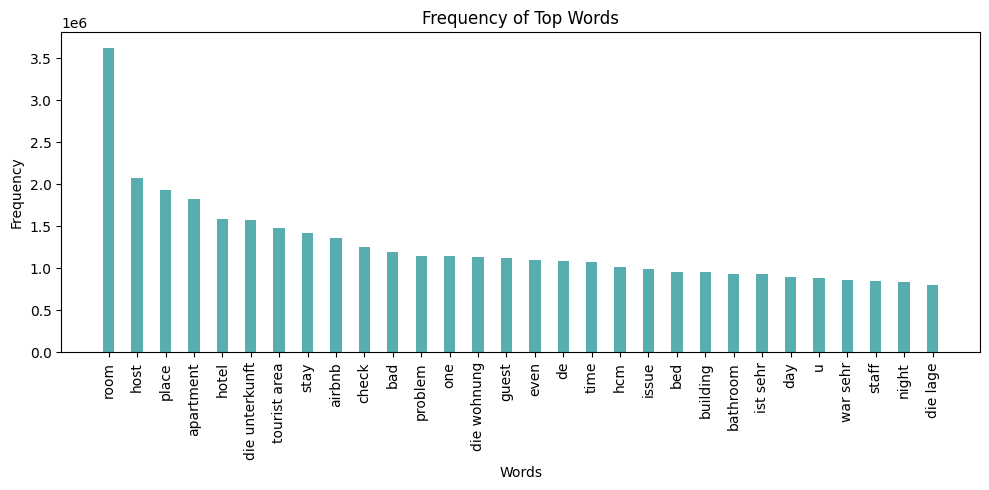

In [69]:
# creating the dataset
courses = list(data['Word'])
values = list(data['Frequency'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color='#58AEAE', width=0.4)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Top Words")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
